# <b><u> Corporation Favorita Store Sales - Time Series Forecasting <b><u> 

`This is a time series forecasting problem. In this project, we'll predict store sales on data from Corporation Favorita, a large Ecuadorian-based grocery retailer`

- `we are to build a model that more accurately predicts the unit sales for thousands of items sold at different Favorita stores.`

- `The training data includes dates, store, and product information, whether that item was being promoted, as well as the sales numbers. Additional files include supplementary information that may be useful in building your models`

## <B> Description<B>

train.csv

- `The training data, comprising time series of features store_nbr, family, and onpromotion as well as the target sales.`

test.csv

- `The test data, having the same features as the training data. You will predict the target sales for the dates in this file.`
- `The dates in the test data are for the 15 days after the last date in the training data.`

transaction.csv

- `Contains date, store_nbr and transaction made on that specific date.`

sample_submission.csv

- `A sample submission file in the correct format.`

stores.csv

- `Store metadata, including city, state, type, and cluster.`

oil.csv

- `Daily oil price which includes values during both the train and test data timeframes.`

holidays_events.csv

- `Holidays and Events, with metadata`

## <b>Hypothesis & Questions

The questions below are to be answered. Do note that, you are free to draw more hypothesis from the data.

1. Is the train dataset complete (has all the required dates)?

2. Which dates have the lowest and highest sales for each year?

3. Did the earthquake impact sales?

4. Are certain groups of stores selling more products? (Cluster, city, state, type)

5. Are sales affected by promotions, oil prices and holidays?

6. What analysis can we get from the date and its extractable features?

7. What is the difference between RMSLE, RMSE, MSE (or why is the MAE greater than all of them?)

<B>NULL HYPOTHESIS<B>: `The type of holiday does not have any significance on the increase of sales`

<B>ALTERNATIVE HYPOTHESIS<B>: `The type of holiday do have significant on the increase of sales`

## Importation

In [103]:
#%pip install statsmodels
#%pip install lightgbm
#%pip install xgboost
#%pip install pmdarima

In [104]:
#%pip install pmdarima.arima
#%pip install catboost 

In [105]:
#data manupulation packages
import numpy as np 
import  pandas as pd 
#data visualization package
import seaborn as sn 
import matplotlib.pyplot as plt
#data connection package
import pyodbc
from dotenv import dotenv_values
import sqlalchemy as sq
import zipfile
import calendar
#ignore warnings(optional)
import warnings
warnings.filterwarnings('ignore')
#import stats packages
from statsmodels.tsa.stattools import adfuller
#machine learning packages
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from scipy import stats
from lightgbm import LGBMRegressor
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from pmdarima.arima import auto_arima
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error




## <b>Data importation

### <i><b> load SQL database; table 1, table 2 and table 3

In [106]:
#load the environment variable
environment_variable= dotenv_values('.env')
## Get the values for the credentials you set in the '.env' file
database = environment_variable.get("DATABASE")
server = environment_variable.get("SERVER")
username = environment_variable.get("USERNAME")
password = environment_variable.get("PASSWORD")
#a connection to the server, user, password and database name
connection_string= f"DRIVER={{SQL server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"



In [107]:
#connectin to the server
connection= pyodbc.connect(connection_string)

In [108]:
# Define SQL queries for each table
query_oil = "SELECT * FROM dbo.oil;"
query_holidays_events = "SELECT * FROM dbo.holidays_events;"
query_stores = "SELECT * FROM dbo.stores;"

In [109]:
# Execute the queries and read data into DataFrames
df_oil = pd.read_sql(query_oil, connection)
df_holidays_events = pd.read_sql(query_holidays_events, connection)
df_stores = pd.read_sql(query_stores, connection)

### Load the csv dataset

In [110]:
# Load the third dataset (it's a CSV file named 'test', 'transaction', 'sample_submission')

test_data = pd.read_csv('test.csv')

transaction_data = pd.read_csv('transactions.csv')

sample_data = pd.read_csv('sample_submission.csv')
train_data = pd. read_csv('train.csv')

### <b>Step 1: Data Exploration and Understanding

### <i> EDA for the sql dataset(holiday_events, stores,oil)

In [111]:

# Display summary statistics for the  columns in holiday_events
holiday_summary = df_holidays_events.describe().T

# Display summary statistics for the  columns in stores_table
stores_summary = df_stores.describe().T

# Display summary statistics for the  columns in oil_table
oil_summary = df_oil.describe().T

# Display the results
print("Holiday Events Summary:")
display(holiday_summary)
print ('=' * 50)
print("Stores Summary:")
display(stores_summary)
print ('=' * 50)
print("Oil Summary:")
display(oil_summary)


Holiday Events Summary:


,count,unique,top,freq
date,350,312,2014-06-25,4
type,350,6,Holiday,221
locale,350,3,National,174
locale_name,350,24,Ecuador,174
description,350,103,Carnaval,10
transferred,350,2,False,338


Stores Summary:


,count,mean,std,min,25%,50%,75%,max
store_nbr,54.0,27.500000,15.732133,1.0,14.25,27.5,40.75,54.0
cluster,54.0,8.481481,4.693395,1.0,4.00,8.5,13.00,17.0


Oil Summary:


,count,mean,std,min,25%,50%,75%,max
dcoilwtico,1175.0,67.714366,25.630476,26.190001,46.405001,53.189999,95.66,110.620003


In [112]:

# Display summary statistics for the 'object' columns in holiday_events
holiday_summary = df_holidays_events.describe(include='object').T

# Display summary statistics for the 'object' columns in stores_table
stores_summary = df_stores.describe(include='object').T

# Display summary statistics for the 'object' columns in oil_table
oil_summary = df_oil.describe(include='object').T

# Display the results
print("Holiday Events Summary:")
display(holiday_summary)
print ('=' * 50)
print("Stores Summary:")
display(stores_summary)
print ('=' * 50)
print("Oil Summary:")
display(oil_summary)


Holiday Events Summary:


,count,unique,top,freq
date,350,312,2014-06-25,4
type,350,6,Holiday,221
locale,350,3,National,174
locale_name,350,24,Ecuador,174
description,350,103,Carnaval,10


Stores Summary:


,count,unique,top,freq
city,54,22,Quito,18
state,54,16,Pichincha,19
type,54,5,D,18


Oil Summary:


,count,unique,top,freq
date,1218,1218,2013-01-01,1


In [113]:

# Display missing value counts for holiday_events
print("Holiday Events Missing Values:")
print('=' * 50)
holiday_events_missing = df_holidays_events.isnull().sum()
display(holiday_events_missing)

# Display missing value counts for stores_table
print("\nStores Table Missing Values:")
print('=' * 50)
stores_missing = df_stores.isnull().sum()
display(stores_missing)

# Display missing value counts for oil_table
print("\nOil Table Missing Values:")
print('=' * 50)
oil_missing =df_oil.isnull().sum()
display(oil_missing)


Holiday Events Missing Values:


date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64


Stores Table Missing Values:


store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64


Oil Table Missing Values:


date           0
dcoilwtico    43
dtype: int64

In [114]:
# Display shape information for holiday_events
print("Holiday Events Shape:")
print('=' * 50)
holiday_events_shape = df_holidays_events.shape
print("Number of rows:", holiday_events_shape[0])
print("Number of columns:", holiday_events_shape[1])

# Display shape information for stores_table
print("\nStores Table Shape:")
print('=' * 50)
stores_shape = df_stores.shape
print("Number of rows:", stores_shape[0])
print("Number of columns:", stores_shape[1])

# Display shape information for oil_table
print("\nOil Table Shape:")
print('=' * 50)
oil_shape =df_oil.shape
print("Number of rows:", oil_shape[0])
print("Number of columns:", oil_shape[1])


Holiday Events Shape:
Number of rows: 350
Number of columns: 6

Stores Table Shape:
Number of rows: 54
Number of columns: 5

Oil Table Shape:
Number of rows: 1218
Number of columns: 2


### EDA FOR CSV FILES(transaction, train and test)

In [115]:
# Display summary statistics for object columns in transaction data
transactions_summary = transaction_data.describe()

# Display summary statistics for object colums in train data
train_summary = train_data.describe(include=object).T

# Display summary statistics for object columns in test data
test_summary = test_data.describe()

# Display results
print("statistics summary for transactions:" )
display(transactions_summary)
print("=" *50)

print("Statistics summary for train data")
display(train_summary)
print("=" *50)

print("statistics summary of test")
display(test_summary)


statistics summary for transactions:


,store_nbr,transactions
count,83488.000000,83488.000000
mean,26.939237,1694.602158
std,15.608204,963.286644
min,1.000000,5.000000
25%,13.000000,1046.000000
50%,27.000000,1393.000000
75%,40.000000,2079.000000
max,54.000000,8359.000000


Statistics summary for train data


,count,unique,top,freq
date,3000888,1684,2013-01-01,1782
family,3000888,33,AUTOMOTIVE,90936


statistics summary of test


,id,store_nbr,onpromotion
count,2.851200e+04,28512.000000,28512.000000
mean,3.015144e+06,27.500000,6.965383
std,8.230850e+03,15.586057,20.683952
min,3.000888e+06,1.000000,0.000000
25%,3.008016e+06,14.000000,0.000000
50%,3.015144e+06,27.500000,0.000000
75%,3.022271e+06,41.000000,6.000000
max,3.029399e+06,54.000000,646.000000


In [116]:
# Display infomation for the transactions

# Display info for the oil price
print("Display holiday info:" )
print("=" *50)
transactions_info =transaction_data.info()
display(transactions_info)

# Display info for the train data set
print("Display train info:" )
print("=" *50)
train_info = train_data.info()
display(train_info)

# Display info for the stotres
print("Display test info:" )
print("=" *50)
test_info = test_data.info()
display(test_info)

Display holiday info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


None

Display train info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


None

Display test info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


None

In [117]:
# Display the null values in transactions data set

print("display Null values in transactions:")
print("=" * 50)
transactions_isnull = transaction_data.isna().sum()
display(transactions_isnull)

print("display Null values in train data set:")
print("=" * 50)
train_isnull = train_data.isna().sum()
display(train_isnull)

print("display Null values in test data:")
print("=" * 50)
test_isnull = test_data.isna().sum()
display(test_isnull)

display Null values in transactions:


date            0
store_nbr       0
transactions    0
dtype: int64

display Null values in train data set:


id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

display Null values in test data:


id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

In [118]:
# Print out the shape of data sets
print(f"Transactions Dataset: {transaction_data.shape}")
print(f"Train Dataset: {train_data.shape}")
print(f"Test Dataset: {test_data.shape}")

Transactions Dataset: (83488, 3)
Train Dataset: (3000888, 6)
Test Dataset: (28512, 5)


## <B> HANDLING MISSING VALUES

In [119]:
# Fill missing values in the 'dcoilwtico' column using backfill strategy
df_oil['dcoilwtico'] = df_oil['dcoilwtico'].fillna(method='backfill')


In [120]:
# check if there is missing values in dcoilwtico column
df_oil.isna().sum()

date          0
dcoilwtico    0
dtype: int64

### <b> Checking if the train data set has all the required dates<b>

1. changing the date tyoe from object to date type

In [121]:
# Check the completeness of the train dataset
min_date = train_data['date'].min()
max_date = train_data['date'].max()
expected_dates = pd.date_range(start=min_date, end=max_date)

missing_dates = expected_dates[~expected_dates.isin(train_data['date'])]

if len(missing_dates) == 0:
    print("The train dataset is complete. It includes all the required dates.")
else:
    print("The train dataset is incomplete. The following dates are missing:")
    print(missing_dates)

The train dataset is incomplete. The following dates are missing:
DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)


In [122]:
train_data

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


From the above it is obvserverd that the dates in train data set is not complete some of the dates are missing which sopposed to be christmas holidays that is 12-25 of every year

`` There were missing dates in; '2013-12-25', '2014-12-25', '2015-12-25' and '2016-12-25'``

In [123]:
train_data['date']=pd.to_datetime(train_data['date'])

In [124]:
# Complete the missing dates in the train dataset
# Create an index of the missing dates as a DatetimeIndex object
missing_dates = pd.Index(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]')

# Create a DataFrame with the missing dates, using the 'date' column
missing_data = pd.DataFrame({'date': missing_dates})

#Concatenate the original train dataset and the missing data DataFrame
# ignore_index=True ensures a new index is assigned to the resulting DataFrame
train_data = pd.concat([train_data, missing_data], ignore_index=True)

# Sort the DataFrame based on the 'date' column in ascending order
train_data.sort_values('date', inplace=True)




In [125]:
# Check the completeness of the train dataset
min_date = train_data['date'].min()
max_date = train_data['date'].max()
expected_dates = pd.date_range(start=min_date, end=max_date)

missing_dates = expected_dates[~expected_dates.isin(train_data['date'])]

if len(missing_dates) == 0:
    print("The train dataset is complete. It includes all the required dates.")
else:
    print("The train dataset is incomplete. The following dates are missing:")
    print(missing_dates)

The train dataset is complete. It includes all the required dates.


In [126]:
# reading the csv file and seting the date as date type
test_data = pd.read_csv("test.csv", parse_dates=["date"])
train_data = pd.read_csv("train.csv", parse_dates=["date"])
transactions = pd.read_csv("transactions.csv",parse_dates=["date"])
sample_data = pd.read_csv("sample_submission.csv")

## <B>CHECKING FOR STATIONALITY

In [127]:
# Assuming 'date' is a column in your DataFrame
transaction_data['date'] = pd.to_datetime(transaction_data['date'])

def check_stationarity(df, title=''):
    print(f"Stationarity Check for {title}")
    print('=' * 50)

    # Replace 'date' with the actual time series column name
    time_series_column = 'date'

    # Calculate ADF test statistics
    result = adfuller(df[time_series_column])

    # Print ADF test results
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values: {result[4]}")

    # Check p-value against significance level (e.g., 0.05)
    if result[1] <= 0.05:
        print("Conclusion: Reject the null hypothesis (Data is stationary)")
    else:
        print("Conclusion: Fail to reject the null hypothesis (Data is non-stationary)")

# Check for stationarity in transaction_data
check_stationarity(transaction_data, "Transaction Data")

Stationarity Check for Transaction Data
ADF Statistic: 44.756037858730345
p-value: 1.0
Critical Values: {'1%': -3.4304283906071458, '5%': -2.8615746473443426, '10%': -2.5667884415822226}
Conclusion: Fail to reject the null hypothesis (Data is non-stationary)


In [128]:
def check_stationarity(df, title):
    # Convert 'date' column to datetime format
    df['date'] = pd.to_datetime(df['date'])

    # Convert 'date' to a numerical representation of time (optional)
    df['numerical_time'] = pd.to_numeric(df['date'])

    # Set 'numerical_time' as the time series column
    time_series_column = 'numerical_time'  # Change to your desired column name

    # Calculate ADF test statistics
    result = adfuller(df[time_series_column])

    # Print ADF test results
    print('=' * 50)
    print(f"ADF Test Results for {title}")
    print('=' * 50)
    print(f"ADF Statistic: {result[0]}")
    print(f"P-value: {result[1]}")
    print(f"Critical Values: {result[4]}")

# Assuming 'date' is the column containing the time series data
check_stationarity(transaction_data, "Transaction Data")

ADF Test Results for Transaction Data
ADF Statistic: 44.756037858730345
P-value: 1.0
Critical Values: {'1%': -3.4304283906071458, '5%': -2.8615746473443426, '10%': -2.5667884415822226}


In [129]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


## Which dates have the lowest and highest sales for each year?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


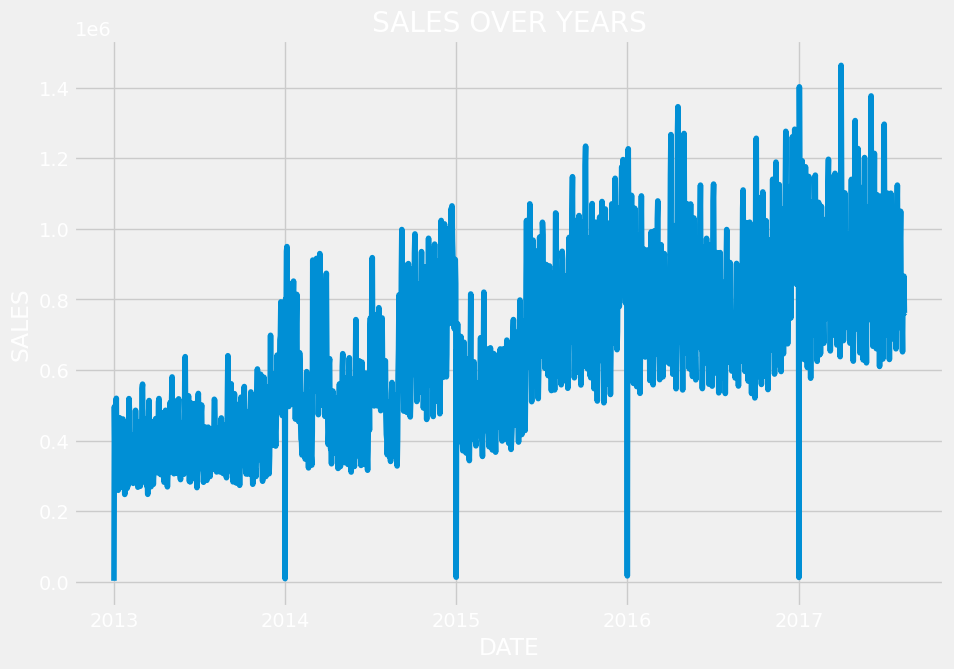

In [130]:
sales_time = train_data.groupby('date').sales.sum().reset_index()

plt.figure(figsize=(10, 7))  # Set the figure size
plt.plot(sales_time['date'], sales_time['sales'])
plt.title('SALES OVER YEARS')
plt.ylabel('SALES')
plt.xlabel('DATE')
plt.style.use("dark_background")
plt.legend().set_visible(False)  # Hide the legend
plt.show()

In [131]:
transaction_data

,date,store_nbr,transactions,numerical_time
0,2013-01-01,25,770,1356998400000000000
1,2013-01-02,1,2111,1357084800000000000
2,2013-01-02,2,2358,1357084800000000000
3,2013-01-02,3,3487,1357084800000000000
4,2013-01-02,4,1922,1357084800000000000
...,...,...,...,...
83483,2017-08-15,50,2804,1502755200000000000
83484,2017-08-15,51,1573,1502755200000000000
83485,2017-08-15,52,2255,1502755200000000000
83486,2017-08-15,53,932,1502755200000000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


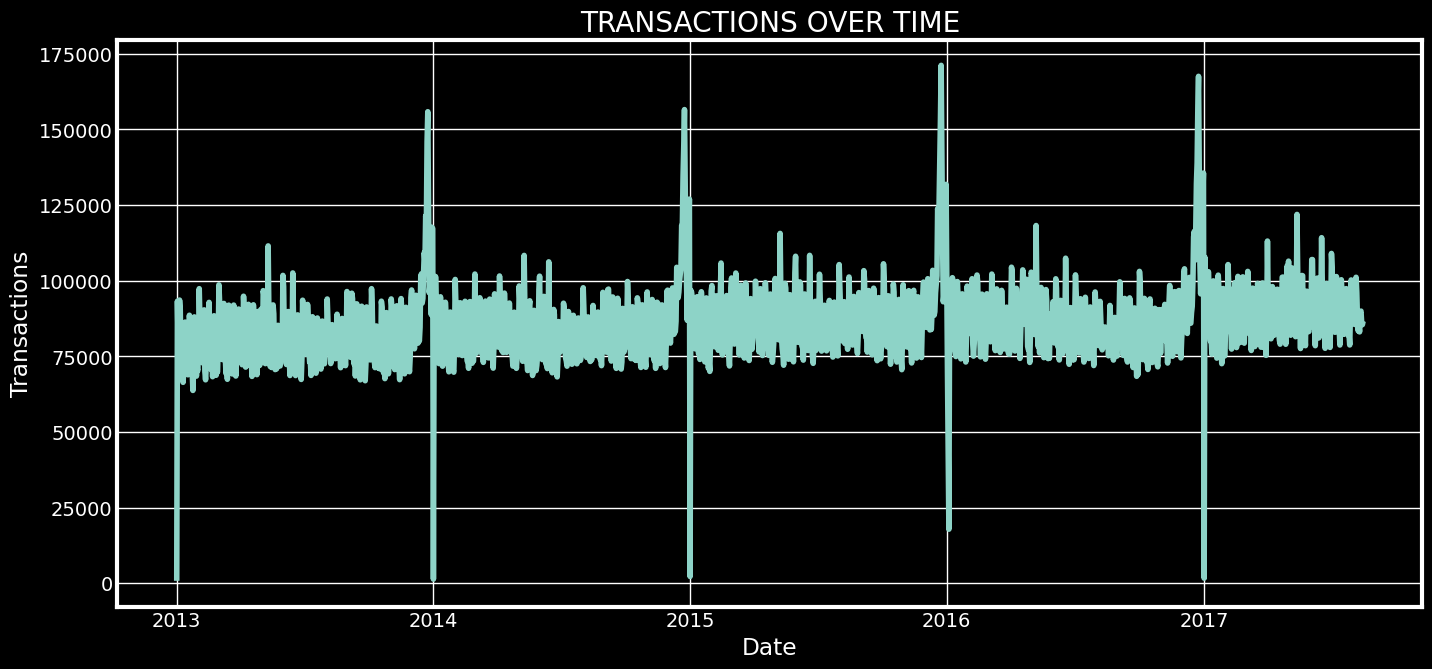

In [132]:
# Assuming 'date' is a datetime column in your DataFrame
transaction_data['date'] = pd.to_datetime(transaction_data['date'])

# Group by date and sum transactions
transaction_time = transaction_data.groupby('date')['transactions'].sum().reset_index()

# Plotting transactions over time
plt.figure(figsize=(15, 7))
plt.plot(transaction_time['date'], transaction_time['transactions'])
plt.title("TRANSACTIONS OVER TIME")
plt.ylabel("Transactions")
plt.xlabel("Date")
plt.style.use("dark_background")
plt.legend().set_visible(False) 
plt.show()

from the transaction trend, we can identify an annual seasonality, where the transactions tend to increase at the starting of every year, and there is a state of stationality during the year. the trend is an indication of presence of  Factor that influences the transactions at the commencement of each year.

## <b> <u> insights on frequency impact of different type of holiday 

In [133]:
df_holidays_events

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


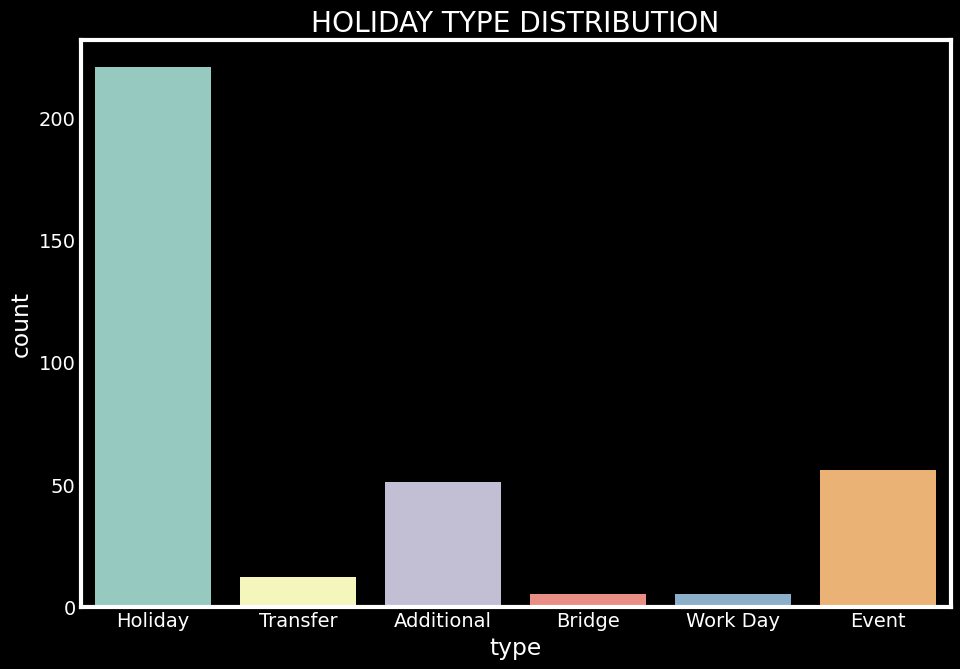

In [134]:
plt.figure(figsize=(10,7))
sn.countplot(x="type",data=df_holidays_events)
plt.title("HOLIDAY TYPE DISTRIBUTION")
plt.style.use("dark_background")
plt.legend().set_visible(False) 
plt.grid(visible=False)
plt.show()

## change of crude oil over time

In [135]:
df_oil

,date,dcoilwtico
0,2013-01-01,93.139999
1,2013-01-02,93.139999
2,2013-01-03,92.970001
3,2013-01-04,93.120003
4,2013-01-07,93.199997
...,...,...
1213,2017-08-25,47.650002
1214,2017-08-28,46.400002
1215,2017-08-29,46.459999
1216,2017-08-30,45.959999


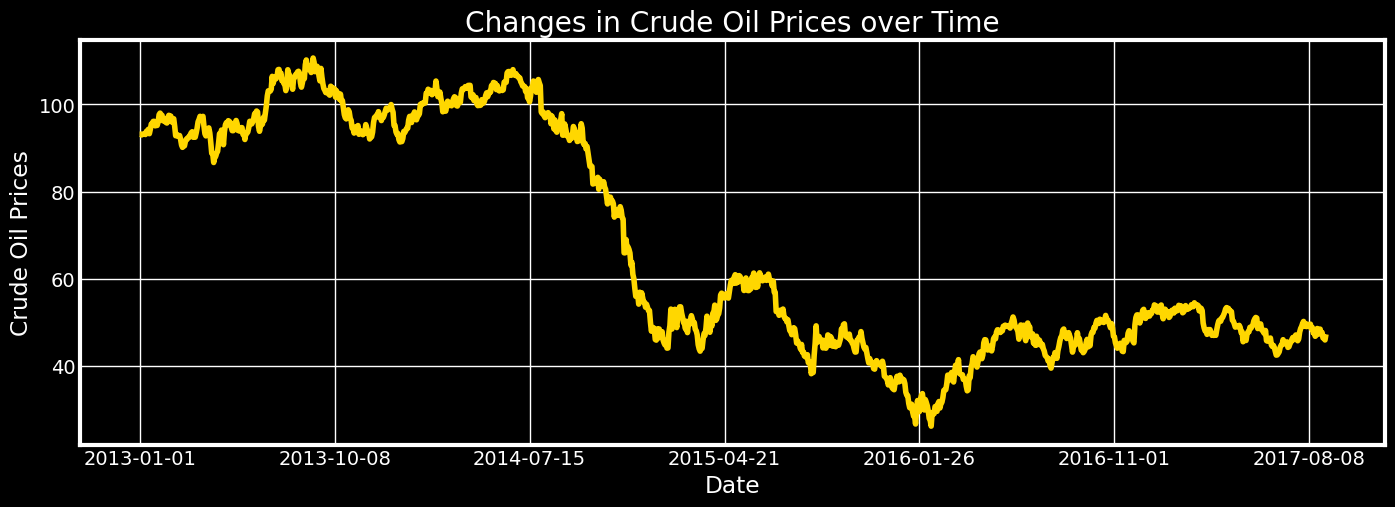

In [136]:
df_oil.set_index("date")
df_oil.plot(x="date", y="dcoilwtico", color="gold", legend=False, figsize=(15,5))
plt.title('Changes in Crude Oil Prices over Time')
plt.xlabel('Date')
plt.ylabel('Crude Oil Prices')
plt.style.use("fivethirtyeight")
plt.show()

#### <b> STORE DISTRIBUTION

In [137]:
df_stores

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


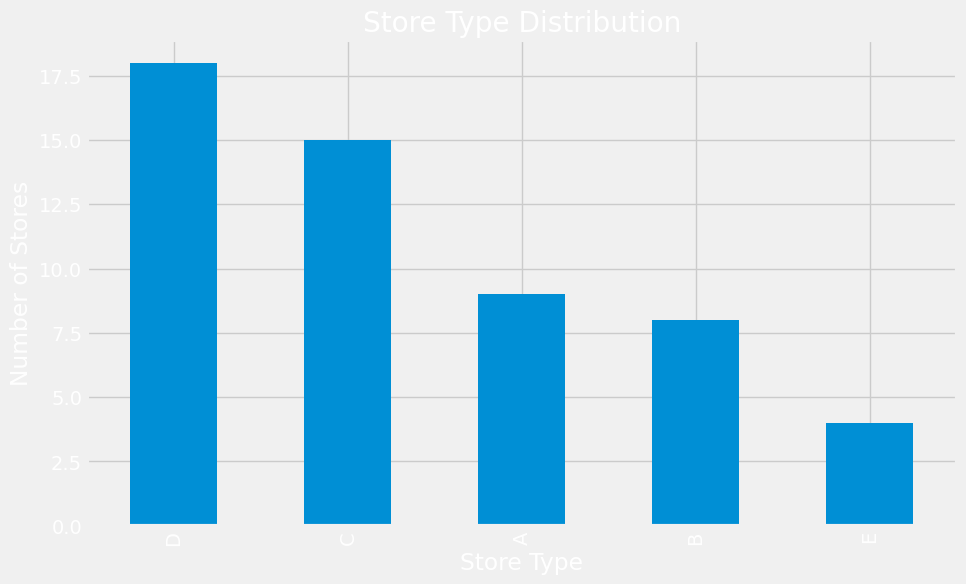

In [138]:
plt.figure(figsize=(10, 6))
df_stores['type'].value_counts().plot(kind='bar')
plt.title('Store Type Distribution')
plt.xlabel('Store Type')
plt.ylabel('Number of Stores')
plt.show()


#### comparison of sales variation and store cluster

In [139]:
train_data

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


## <b> Sales accross stores

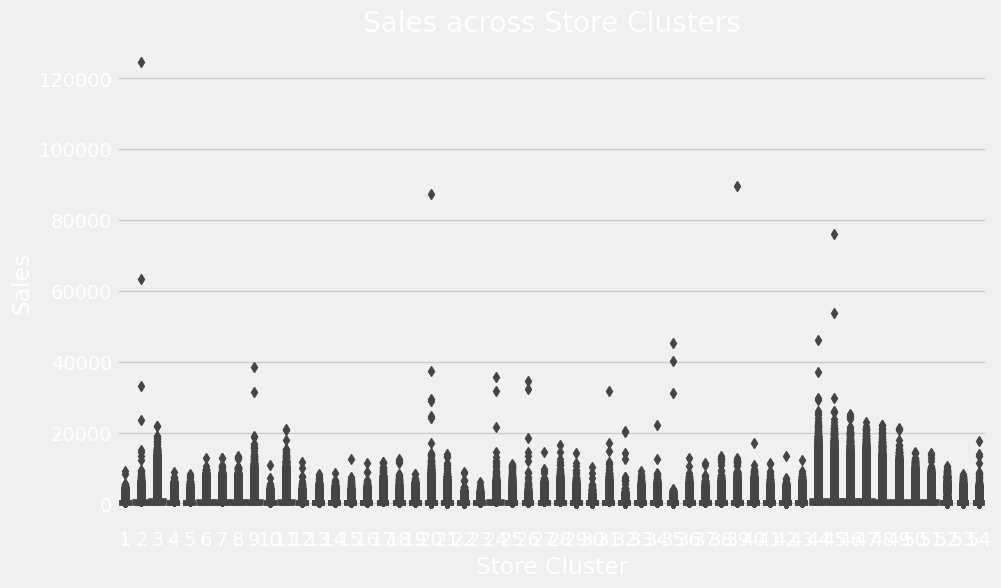

In [140]:
# Box plot to compare sales across store clusters
plt.figure(figsize=(10, 6))
sn.boxplot(x='store_nbr', y='sales', data=train_data)
plt.title('Sales across Store Clusters')
plt.xlabel('Store Cluster')
plt.ylabel('Sales')
plt.style.use("fivethirtyeight")
plt.show()

In [141]:

df_oil['date']=pd.to_datetime(df_oil['date'])

In [142]:
#perform an inner joib
train_oil_df = pd.merge(train_data, df_oil, on="date", how="inner")
train_oil_df

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,93.139999
1,1,2013-01-01,1,BABY CARE,0.000,0,93.139999
2,2,2013-01-01,1,BEAUTY,0.000,0,93.139999
3,3,2013-01-01,1,BEVERAGES,0.000,0,93.139999
4,4,2013-01-01,1,BOOKS,0.000,0,93.139999
...,...,...,...,...,...,...,...
2143741,3000883,2017-08-15,9,POULTRY,438.133,0,47.570000
2143742,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.570000
2143743,3000885,2017-08-15,9,PRODUCE,2419.729,148,47.570000
2143744,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.570000


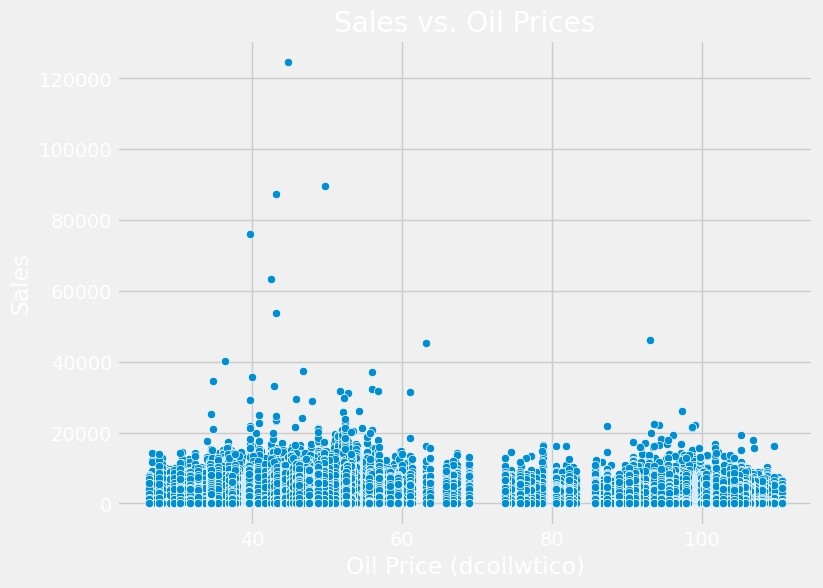

In [143]:
# Scatter plot to compare sales with oil prices

plt.figure(figsize=(8, 6))
sn.scatterplot(x='dcoilwtico', y='sales', data=train_oil_df)
plt.title('Sales vs. Oil Prices')
plt.xlabel('Oil Price (dcoilwtico)')
plt.ylabel('Sales')
plt.show()

In [144]:
df_holidays_events['date']=pd.to_datetime(df_holidays_events['date'])
df_holidays_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


In [145]:
#merging the datasets
# Merge dataframes using inner join to avoid missing values
timeseries_df = train_data.merge(df_stores, on='store_nbr', how='inner')
timeseries_df = timeseries_df.merge(df_holidays_events, on='date', how='inner')
timeseries_df= timeseries_df.merge(df_oil, on='date', how='inner')
timeseries_df= timeseries_df.merge(transaction_data, on=['date', 'store_nbr'], how='inner')


## <B> FEATURING  ENGINEERING

In [148]:
#series data index resetting is;
timeseries_df.reset_index(drop=True, inplace=True)

# identification of scaling columns in the series data set
numeric_features = ['sales', 'dcoilwtico', 'transactions']

# one hot codign
categorical_features = ['family', 'city', 'state', 'type_x', 'type_y', 'locale', 'locale_name', 'description']

# Scale the numeric features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(timeseries_df[numeric_features])





In [149]:
# categorical feature encoding
onehot_encoder = OneHotEncoder(sparse=False)
encoded_features = onehot_encoder.fit_transform(timeseries_df[categorical_features])

# scaling numeric feature dataframe
scaled_df = pd.DataFrame(scaled_features, columns=numeric_features)

# Create a DataFrame for the encoded categorical features
encoded_df = pd.DataFrame(encoded_features, columns=onehot_encoder.get_feature_names_out(categorical_features))

# Concatenate the scaled numeric features and encoded categorical features
transformed_df = pd.concat([timeseries_df['date'], scaled_df, encoded_df], axis=1)

# Display the transformed DataFrame
transformed_df.head()

,date,sales,dcoilwtico,transactions,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,...,description_Terremoto Manabi+30,description_Terremoto Manabi+4,description_Terremoto Manabi+5,description_Terremoto Manabi+6,description_Terremoto Manabi+9,description_Traslado Batalla de Pichincha,description_Traslado Independencia de Guayaquil,description_Traslado Primer Grito de Independencia,description_Traslado Primer dia del ano,description_Viernes Santo
0,2013-01-01,-0.325920,1.186995,-0.917916,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2013-01-01,-0.325920,1.186995,-0.917916,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2013-01-01,-0.324316,1.186995,-0.917916,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2013-01-01,0.323701,1.186995,-0.917916,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2013-01-01,-0.325920,1.186995,-0.917916,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## <b>  train and test data Spilting 

In [151]:
# Define the split date
split_date = '2017-01-01'

# Convert the split date to a pandas Timestamp object
split_date = pd.Timestamp(split_date)

# Split the transformed DataFrame into training and test sets
train_df = transformed_df[transformed_df['date'] < split_date]
test_df = transformed_df[transformed_df['date'] >= split_date]

# Separate the features (X) and the target variable (y) for training and test sets
X_train = train_df.drop(['date', 'sales'], axis=1)
y_train = train_df['sales']
X_test = test_df.drop(['date', 'sales'], axis=1)
y_test = test_df['sales']

# Reset the index of the training and test sets
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# Verify the lengths of the training and test sets
print("Length of X_train:", len(X_train))
print("Length of y_train:", len(y_train))
print("Length of X_test:", len(X_test))
print("Length of y_test:", len(y_test))




Length of X_train: 284889
Length of y_train: 284889
Length of X_test: 37158
Length of y_test: 37158


In [152]:
# Search for the best ARIMA parameters
arima_model = auto_arima(y_train, start_p=0, d=None, start_q=0, max_p=3, max_d=2, max_q=3,
                         start_P=0, D=None, start_Q=0, max_P=2, max_D=1, max_Q=2,
                         m=7, seasonal=True, trace=True, error_action='ignore', suppress_warnings=True,
                         stepwise=True)

# Get the best ARIMA parameters
best_params_arima = arima_model.order

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=971680.589, Time=4.35 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=900080.119, Time=45.29 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=794741.216, Time=174.38 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=971678.589, Time=3.46 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=795639.666, Time=175.27 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=793727.641, Time=452.49 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=794920.867, Time=120.33 sec
 ARIMA(0,1,1)(2,0,1)[7] intercept   : AIC=791773.605, Time=640.51 sec
 ARIMA(0,1,1)(2,0,0)[7] intercept   : AIC=792233.815, Time=361.97 sec


MemoryError: Unable to allocate 628. MiB for an array with shape (284889, 17, 17) and data type float64

In [153]:
# Initialize the ARIMA model with the best parameters
arima_model = ARIMA(y_train, order=best_params_arima['order'])

# Fit the model to the training data
arima_model_fit = arima_model.fit()

NameError: name 'best_params_arima' is not defined

In [154]:
# Search for the best SARIMA parameters
sarima_model = auto_arima(y_train, start_p=0, d=None, start_q=0, max_p=3, max_d=2, max_q=3,
                          start_P=0, D=None, start_Q=0, max_P=2, max_D=1, max_Q=2,
                          m=7, seasonal=True, trace=True, error_action='ignore', suppress_warnings=True,
                          stepwise=True)

# Get the best SARIMA parameters
best_params_sarima = sarima_model.order

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=971680.589, Time=4.98 sec


MemoryError: Unable to allocate 176. MiB for an array with shape (9, 9, 284889) and data type float64

In [155]:
# Initialize the SARIMAX model with the best parameters
sarima_model = SARIMAX(y_train, order=best_params_sarima['order'], seasonal_order=best_params_sarima['seasonal_order'])

# Fit the model to the training data
sarima_model_fit = sarima_model.fit()

NameError: name 'best_params_sarima' is not defined

##### -CatBoost is known for its high predictive accuracy, fast training speed, and robustness to handle noisy data. It includes advanced features such as customizable loss functions, built-in cross-validation, early stopping, and feature importance analysis. Additionally, CatBoost provides options to handle class imbalance, missing values, and user-defined features.

##### By utilizing the CatBoost Regressor, we can leverage its ability to handle categorical features effectively and obtain accurate predictions for our time series forecasting task.

In [156]:
# Define the parameter grid for CatBoost
param_grid_catboost = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'depth': [4, 6, 8]
}

# Initialize the CatBoost model
catboost_model = CatBoostRegressor()

# Perform grid search for CatBoost
grid_search_catboost = GridSearchCV(estimator=catboost_model, param_grid=param_grid_catboost, scoring='neg_mean_absolute_error')
grid_search_catboost.fit(X_train, y_train)

# Get the best parameters and best score for CatBoost
best_params_catboost = grid_search_catboost.best_params_
best_score_catboost = -grid_search_catboost.best_score_


MemoryError: Unable to allocate 327. MiB for an array with shape (188, 227911) and data type float64

In [157]:
# Initialize the CatBoostRegressor model with the best parameters
best_catboost_model = CatBoostRegressor(iterations=best_params_catboost['iterations'], 
                                        learning_rate=best_params_catboost['learning_rate'],
                                        depth=best_params_catboost['depth'])

# Train the model on the training data
best_catboost_model.fit(X_train, y_train)


NameError: name 'best_params_catboost' is not defined

##### XGBoost Regressor: XGBoost (Extreme Gradient Boosting) is an optimized implementation of gradient boosting. It is known for its speed, scalability, and performance. XGBoost includes regularization techniques to prevent overfitting and uses a more efficient tree-building algorithm. It has become popular in various machine learning competitions and is widely used in both regression and classification tasks.

In [159]:
# Define the parameter grid for XGBoost
param_grid_xgboost = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [4, 6, 8]
}

# Initialize the XGBoost model
xgb_model = XGBRegressor()

# Perform grid search for XGBoost
grid_search_xgboost = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgboost, scoring='neg_mean_absolute_error')
grid_search_xgboost.fit(X_train, y_train)

# Get the best parameters and best score for XGBoost
best_params_xgboost = grid_search_xgboost.best_params_
best_score_xgboost = -grid_search_xgboost.best_score_


In [158]:
# Initialize the XGBoostRegressor model with the best parameters
xgb_model = XGBRegressor(n_estimators=best_params_xgboost['n_estimators'],
                         learning_rate=best_params_xgboost['learning_rate'],
                         max_depth=best_params_xgboost['max_depth'])

# Train the model on the training data
xgb_model.fit(X_train, y_train)

NameError: name 'best_params_xgboost' is not defined

### <b>prediction data set<b> ###

#### various models to predict the future values of the target variable (sales) based on the provided input features. After obtaining the predicted sales values for each model, we can evaluate their performance using metrics such as mean absolute error (MAE) and root mean squared error (RMSE). These metrics provide an indication of how well each model predicts the sales values compared to the actual values in the test data.By comparing the performance of different models, we can assess their accuracy and suitability for the time series forecasting task. ####

In [ ]:
# Make predictions on the test data for ARIMA
arima_start = len(y_train)
arima_end = len(y_train) + len(y_test) - 1
arima_preds = arima_model_fit.predict(start=arima_start, end=arima_end)

# Make predictions on the test data for SARIMA
sarima_start = len(y_train)
sarima_end = len(y_train) + len(y_test) - 1
sarima_preds = sarima_model_fit.predict(start=sarima_start, end=sarima_end)

# Make predictions on the test data for XGBoost
xgb_preds = xgb_model.predict(X_test)

# Make predictions on the test data for CatBoost
catboost_preds = catboost_model.predict(X_test)



In [ ]:
# Plot the actual values
plt.plot(y_test.index, y_test, label='Actual')

# Plot the predicted values for ARIMA
plt.plot(y_test.index, arima_preds, label='ARIMA')

# Plot the predicted values for SARIMA
plt.plot(y_test.index, sarima_preds, label='SARIMA')

# Plot the predicted values for XGBoost
plt.plot(y_test.index, xgb_preds, label='XGBoost')

# Plot the predicted values for CatBoost
plt.plot(y_test.index, catboost_preds, label='CatBoost')

# Set the title and labels for the plot
plt.title('Sales Predictions')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

# Display the plot
plt.show()

#### <i>model perfomance

ARIMA and SARIMA: The ARIMA and SARIMA models provide predictions for the future sales values based on the historical data. We calculate the mean absolute error (MAE) and root mean squared error (RMSE) between the predicted sales values and the actual values in the test data. These metrics quantify the average and overall difference between the predicted and actual values, providing an indication of the model's accuracy.

Random Forest Regressor: The Random Forest Regressor model predicts the sales values using the input features. We calculate the MAE and RMSE between the predicted sales values and the actual values in the test data to assess the model's performance.

Gradient Boosting Regressor: Similar to Random Forest, the Gradient Boosting Regressor model predicts the sales values based on the input features. We compute the MAE and RMSE to evaluate how well the model captures the actual sales values.

XGBoost Regressor: The XGBoost Regressor model generates predictions for the sales values using the input features. We calculate the MAE and RMSE to assess the model's accuracy and precision.

Linear Regression: The Linear Regression model predicts the sales values based on the input features. We measure the MAE and RMSE to evaluate the model's performance in capturing the actual sales values.

Support Vector Regression: The Support Vector Regression model provides predictions for the sales values using the input features. We compute the MAE and RMSE to assess the model's accuracy and ability to capture the actual sales values.


In [ ]:
# Evaluate the performance of the models
arima_mae = mean_absolute_error(y_test, arima_preds)
arima_rmse = mean_squared_error(y_test, arima_preds, squared=False)
sarima_mae = mean_absolute_error(y_test, sarima_preds)
sarima_rmse = mean_squared_error(y_test, sarima_preds, squared=False)
xgb_mae = mean_absolute_error(y_test, xgb_preds)
xgb_rmse = mean_squared_error(y_test, xgb_preds, squared=False)
catboost_mae = mean_absolute_error(y_test, catboost_preds)
catboost_rmse = mean_squared_error(y_test, catboost_preds, squared=False)

#### results

results showing the performance of each model in terms of accuracy and precision. The lower the MAE and RMSE values, the better the model's performance in capturing the actual sales values. By comparing the evaluation results, we can determine which model performs best for the given time series forecasting task.

In [ ]:
# Calculate MAE for ARIMA
arima_mae = mean_absolute_error(y_test, arima_preds)

# Calculate RMSE for ARIMA
arima_rmse = mean_squared_error(y_test, arima_preds, squared=False)

# Calculate RMSLE for ARIMA
arima_rmsle = np.sqrt(mean_squared_log_error(y_test, arima_preds))

# Calculate MSLE for ARIMA
arima_msle = mean_squared_log_error(y_test, arima_preds)

# Calculate MAE for SARIMA
sarima_mae = mean_absolute_error(y_test, sarima_preds)

# Calculate RMSE for SARIMA
sarima_rmse = mean_squared_error(y_test, sarima_preds, squared=False)

# Calculate RMSLE for SARIMA
sarima_rmsle = np.sqrt(mean_squared_log_error(y_test, sarima_preds))

# Calculate MSLE for SARIMA
sarima_msle = mean_squared_log_error(y_test, sarima_preds)
# Calculate MAE for XGBoost
xgb_mae = mean_absolute_error(y_test, xgb_preds)
# Calculate RMSE for XGBoost
xgb_rmse = mean_squared_error(y_test, xgb_preds, squared=False)
# Calculate RMSLE for XGBoost
xgb_rmsle = np.sqrt(mean_squared_log_error(y_test, xgb_preds))
# Calculate MSLE for XGBoost
xgb_msle = mean_squared_log_error(y_test, xgb_preds)
# Calculate MAE for CatBoost
catboost_mae = mean_absolute_error(y_test, catboost_preds)
# Calculate RMSE for CatBoost
catboost_rmse = mean_squared_error(y_test, catboost_preds, squared=False)
# Calculate RMSLE for CatBoost
catboost_rmsle = np.sqrt(mean_squared_log_error(y_test, catboost_preds))
# Calculate MSLE for CatBoost
catboost_msle = mean_squared_log_error(y_test, catboost_preds)

In [ ]:
# Create a DataFrame to store the evaluation results
results = pd.DataFrame({
    'Model': ['ARIMA', 'SARIMA', 'XGBoost', 'CatBoost'],
    'MAE': [arima_mae, sarima_mae, xgb_mae, catboost_mae],
    'RMSE': [arima_rmse, sarima_rmse, xgb_rmse, catboost_rmse],
    'RMSLE': [arima_rmsle, sarima_rmsle, xgb_rmsle, catboost_rmsle],
    'MSLE': [arima_msle, sarima_msle, xgb_msle, catboost_msle]
})

# Display the results DataFrame
results

### FINE TUNING

In [ ]:
#Fine-tuning XGBoost model
param_grid = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
